In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os
from sklearn.cluster import KMeans
path=os.path.expanduser("~/Desktop")
os.chdir(path)
file = "points_3.csv"
data=pd.read_csv(file)
%matplotlib inline

In [22]:
data=data[["X","Y"]]
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.2, random_state=1)
X_train.head()

,X,Y
10919,-73.987680,40.759405
5655,-73.985981,40.772178
13761,-73.975299,40.778221
6402,-73.965316,40.797876
6026,-73.994980,40.720542


In [27]:
from math import sin, cos, sqrt, atan2, radians
from sklearn import metrics
def dist(p1,p2):
    R = 6373.0
    lat1 = radians(p1[1])
    lon1 = radians(p1[0])
    lat2 = radians(p2[1])
    lon2 = radians(p2[0])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance
def avg_dist2(solver,dataset):
    centroids=solver.cluster_centers_
    row_labels=solver.labels_
    labels=np.unique(solver.labels_)
    labeled_dataset={}
    rows=np.asarray(dataset)
    for label, row in zip(row_labels,rows):
        try:
            labeled_dataset[label].append(row)
        except KeyError:
            labeled_dataset[label]=[row]
        except AttributeError:
            print(labeled_dataset[label])
    for l,points in zip(labeled_dataset.keys(),labeled_dataset.values()):
        s=0
        for point in points:
            s+=dist(centroids[l],point)
    avg_dist=s/len(rows)
    return avg_dist,avg_dist
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
kmeans.predict(X_test)
centroids=kmeans.cluster_centers_
score=kmeans.score(X_test)
#print(centroids)
#print(score)
#print(avg_dist2(kmeans,X_train)[1])



[[-73.99281926  40.73863001]
 [-73.9675637   40.77483273]]
-1.1401155621970247
0.870635838806


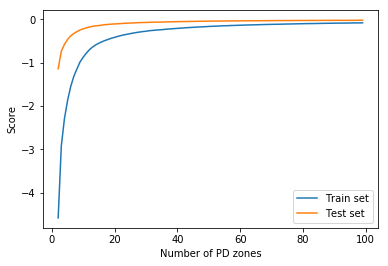

Text(0,0.5,u'Average walking distance to the closest PD zone [km]')

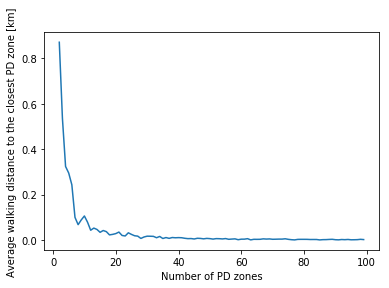

In [29]:
k_list=np.arange(2,100)
train_scores=list()
test_scores=list()
avg_distances=list()
for k in k_list:
    kmeans = KMeans(n_clusters=int(k), random_state=0).fit(X_train)
    train_score=kmeans.score(X_train)
    train_scores.append(train_score)
    test_score=kmeans.score(X_test)
    test_scores.append(test_score)
    avg_distance=avg_dist2(kmeans,X_train)
    avg_distances.append(avg_distance[1])
#print(avg_distances)
plt.figure(1)
plt.plot(k_list,train_scores,label="Train set")
plt.plot(k_list,test_scores,label="Test set")
plt.xlabel("Number of PD zones")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.figure(2)
plt.plot(k_list,avg_distances)
plt.xlabel("Number of PD zones")
plt.ylabel("Average walking distance [km]")
